[ 2494  4984  9964 19924 39844 59764 79684]


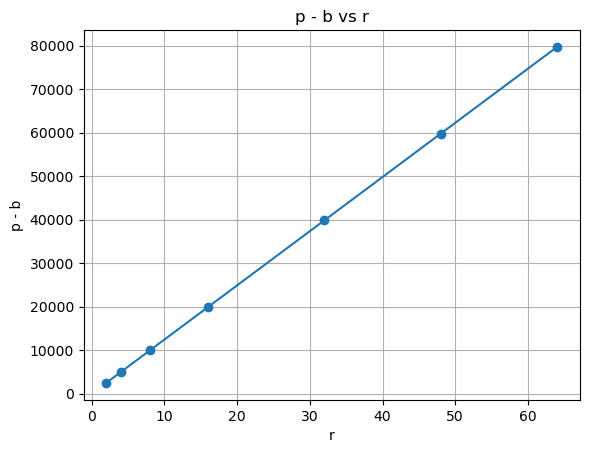

slope: 1245.0, intercept: 4.0, r_value: 0.9999999999999998, p_value: 1.4112478713238384e-39, std_err: 1.1733280679314236e-05
92.87309236947792


In [1]:
import numpy as np
import matplotlib.pyplot as plt

b = 115627
r = [2, 4, 8, 16, 32, 48, 64]
p = [118117 + 4, 120607 + 4, 125587 + 4, 135547 + 4, 155467 + 4, 175387 + 4, 195307 + 4]

p = np.array(p)
r = np.array(r)
p = p - b

print(p)

plt.plot(r, p, 'o-')
plt.xlabel('r')
plt.ylabel('p - b')
plt.title('p - b vs r')
plt.grid()
plt.show()

# make a linear fit
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(r, p)
print(f'slope: {slope}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}')
print(b/slope)

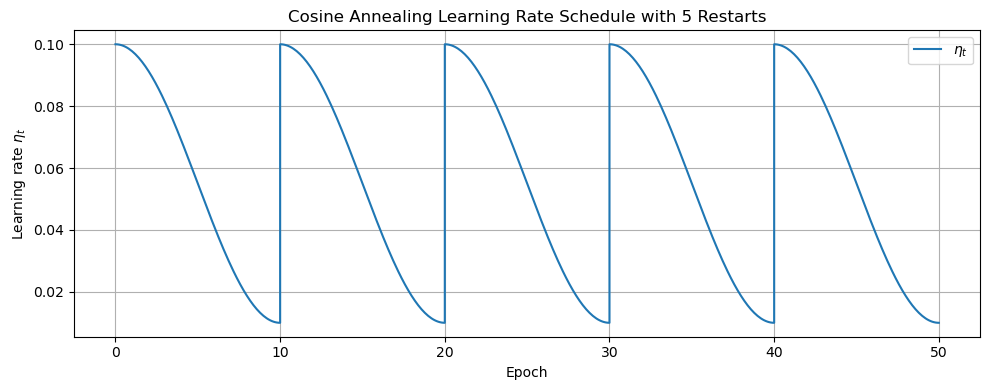

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta = 0.1  # initial learning rate
eta_min = eta / 10  # minimum learning rate
T_i = 10  # epochs between restarts
num_restarts = 5  # number of cosine restarts

# Generate the full learning rate schedule
eta_schedule = []
epochs = []

for k in range(num_restarts):
    T_cur = np.linspace(0, T_i, 100)
    eta_t = eta_min + 0.5 * (eta - eta_min) * (1 + np.cos(np.pi * T_cur / T_i))
    eta_schedule.extend(eta_t)
    epochs.extend(T_cur + k * T_i)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(epochs, eta_schedule, label=r'$\eta_t$')
plt.title(f'Cosine Annealing Learning Rate Schedule with {num_restarts} Restarts')
plt.xlabel('Epoch')
plt.ylabel(r'Learning rate $\eta_t$')
plt.grid(True)
plt.legend()
plt.tight_layout()
#save as svg
plt.savefig('figures/cosine_annealing.svg', format='svg')
plt.show()
